### Monte Carlo Integration

Monte Carlo integration approximates an integral by interpreting it as an **expected value**. For an integral over an interval $[a, b]$:

\begin{equation}
\int_a^b f(x) \, dx,
\end{equation}

we can approximate this by sampling $x$ uniformly in $[a, b]$ and computing the expectation:

\begin{equation}
\int_a^b f(x) \, dx \approx (b - a) \cdot \mathbb{E}_{x \sim \text{Uniform}(a, b)}[f(x)] = \frac{b - a}{N} \sum_{i=1}^N f(x_i),.
\end{equation}

This is achieved by taking multiple uniform samples of $x$, evaluating $f(x)$ at each, averaging the results, and scaling by the interval width $(b - a)$

**Convergence in  $\mathbb{R}^n$**: The order of convergence remains $O\left(\frac{1}{\sqrt{N}}\right)$ regardless of the dimension $n$, unlike grid-based methods that suffer from exponential growth in computational cost (the "curse of dimensionality").

Integration results for f(x) = x^2 over [0, 2]:
Exact Solution: 2.6666666666666665

   N (Samples)  Trapezium Result  Monte Carlo Result
0           10          2.683128            2.662264
1           50          2.667222            2.488183
2          100          2.666803            2.230961
3          500          2.666672            2.701432
4         1000          2.666668            2.750191
5         5000          2.666667            2.706939
6        10000          2.666667            2.698530
7       100000          2.666667            2.671959

   N (Samples)  Trapezium Error  Monte Carlo Error
0           10     1.646091e-02           0.004403
1           50     5.553242e-04           0.178484
2          100     1.360405e-04           0.435706
3          500     5.354731e-06           0.034765
4         1000     1.336004e-06           0.083525
5         5000     5.335467e-08           0.040273
6        10000     1.333600e-08           0.031863
7       100000     1.333360e-1

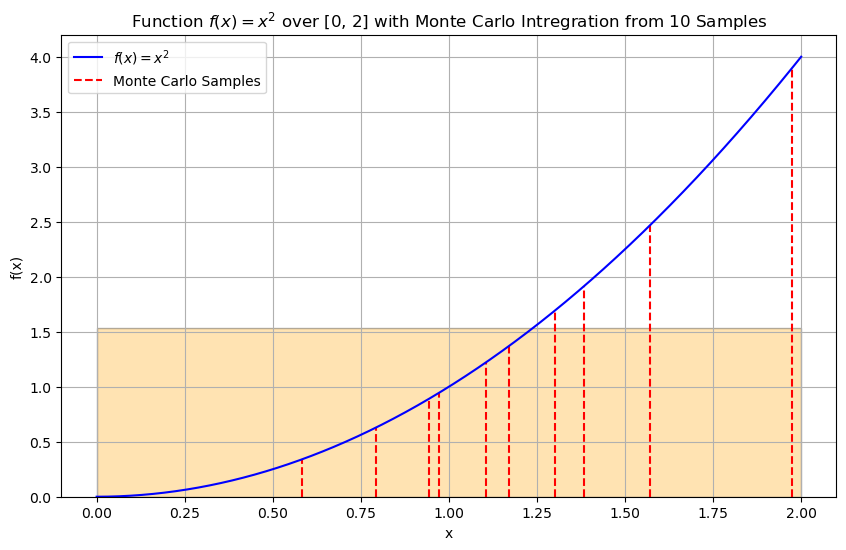

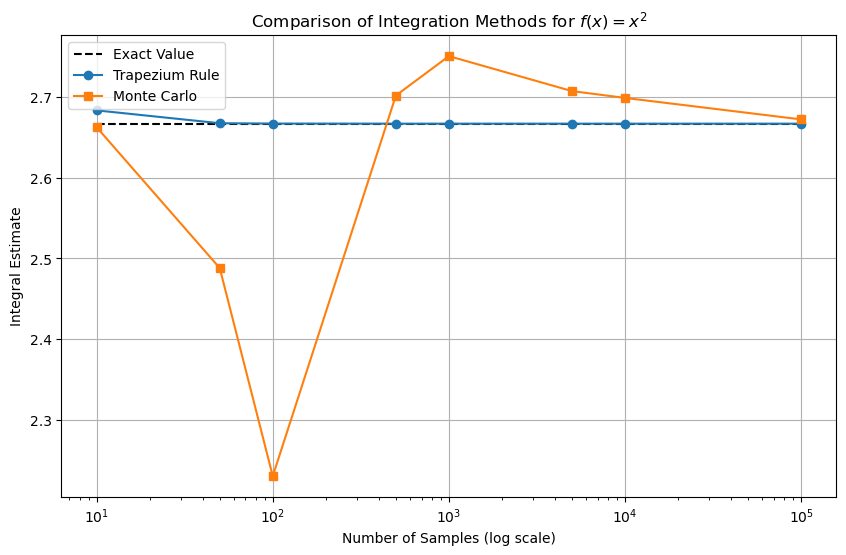

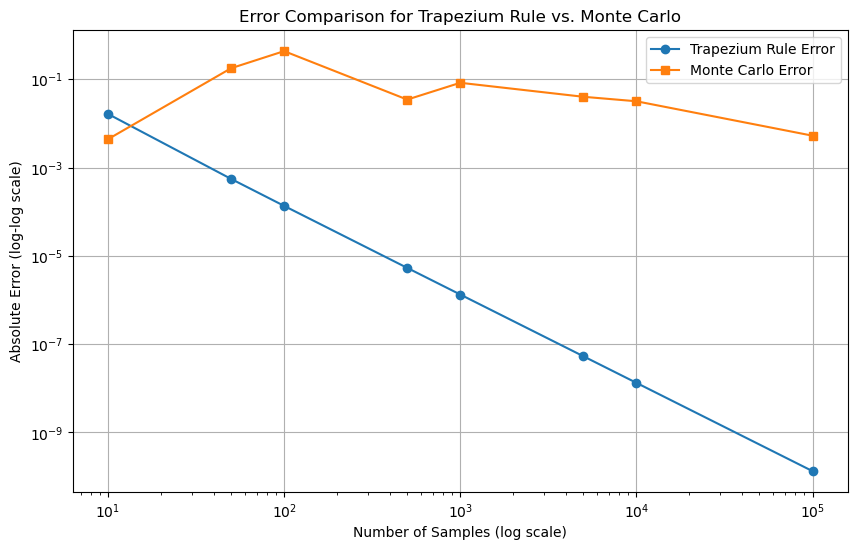

In [880]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def exact_integral_x2(a, b):
    """Calculate the exact integral of x^2 over [a, b]."""
    return (b**3 / 3) - (a**3 / 3)

def trapezium_rule_x2(a, b, N):
    """Approximate the integral of x^2 over [a, b] using the trapezium rule."""
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    f_x = x**2
    integral = h * (0.5 * f_x[0] + np.sum(f_x[1:-1]) + 0.5 * f_x[-1])
    return integral

def monte_carlo_x2(a, b, N):
    """Approximate the integral of x^2 over [a, b] using Monte Carlo sampling."""
    samples = np.random.uniform(a, b, N)
    f_samples = samples**2
    integral = (b - a) * np.mean(f_samples)
    return integral

# Define the interval and the exact solution for comparison
a, b = 0, 2  # Integrate over [0, 2]
exact_value = exact_integral_x2(a, b)

# Number of samples for Monte Carlo and trapezium rule
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 100000]

# Arrays to store results
trapezium_results = []
monte_carlo_results = []
trapezium_errors = []
monte_carlo_errors = []

for N in sample_sizes:
    # Trapezium rule integration
    trapezium_result = trapezium_rule_x2(a, b, N)
    trapezium_results.append(trapezium_result)
    trapezium_errors.append(abs(trapezium_result - exact_value))

    # Monte Carlo integration
    monte_carlo_result = monte_carlo_x2(a, b, N)
    monte_carlo_results.append(monte_carlo_result)
    monte_carlo_errors.append(abs(monte_carlo_result - exact_value))

# Display results in a structured format
results_df = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Trapezium Result': trapezium_results,
    'Monte Carlo Result': monte_carlo_results,
})

results_df_errors = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Trapezium Error': trapezium_errors,
    'Monte Carlo Error': monte_carlo_errors
})

print("Integration results for f(x) = x^2 over [0, 2]:")
print("Exact Solution:", exact_value)
print("")
print(results_df)
print("")
print(results_df_errors)

# Plot 1: Function f(x) = x^2 with a single Monte Carlo rectangle
x_vals = np.linspace(a, b, 1000)
f_x_vals = x_vals**2

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_x_vals, label=r'$f(x) = x^2$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function $f(x) = x^2$ over [0, 2] with Monte Carlo Intregration from 10 Samples')

# Generate 10 random samples for the Monte Carlo estimate
N_samples = 10
samples = np.random.uniform(a, b, N_samples)
sample_heights = samples**2
average_height = np.mean(sample_heights)
width = b - a

# Draw the Monte Carlo rectangle
plt.bar((a + b) / 2, average_height, width=width, color='orange', edgecolor='black', alpha=0.3, align='center', label='Monte Carlo Sample Mean')

# Add vertical dotted lines for each sample
for sample_x, sample_y in zip(samples, sample_heights):
    plt.vlines(sample_x, ymin=0, ymax=sample_y, color='red', linestyle='--')  # Vertical lines for sample points

# Legend and grid
plt.legend(['$f(x) = x^2$', 'Monte Carlo Samples'])
plt.grid(True)
plt.show()

# Plot 2: Comparison of Integration Results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, [exact_value] * len(sample_sizes), 'k--', label='Exact Value')
plt.plot(sample_sizes, trapezium_results, 'o-', label='Trapezium Rule')
plt.plot(sample_sizes, monte_carlo_results, 's-', label='Monte Carlo')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Integral Estimate')
plt.title('Comparison of Integration Methods for $f(x) = x^2$')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Error Comparison
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, trapezium_errors, 'o-', label='Trapezium Rule Error')
plt.plot(sample_sizes, monte_carlo_errors, 's-', label='Monte Carlo Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Absolute Error (log-log scale)')
plt.title('Error Comparison for Trapezium Rule vs. Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()


### Monte Carlo Integration General case

In the general case, if $ f(x) $ is integrated over a domain $ D $ using a probability density function (pdf) $ p(x) $ defined on $ D $, the Monte Carlo approximation becomes:

\begin{equation}
\int_D f(x) \, dx \approx \mathbb{E}_{x \sim p(x)} \left[ \frac{f(x)}{p(x)} \right] = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)},
\end{equation}

where $x_i$ are samples drawn from the distribution with density $p(x)$, and $N$ is the total number of samples. 

Substituting in the pdf for the uniform distribution between $a$ and $b$:

\begin{equation}
p(x) = 
\begin{cases}
\frac{1}{b - a}, & \text{if } a \leq x \leq b, \\
0, & \text{otherwise}.
\end{cases}
\end{equation}

it can be seen how the Monte Carlo Integration for uniform distributions is formed.

The ability to choose the pdf allows for **importance sampling**, where $p(x)$ is chosen to concentrate samples in regions where $f(x)$ is large, improving the approximation's efficiency.

### Using Probability Density Functions for Importance Sampling

While uniform sampling works well for simple functions, **importance sampling** can significantly improve efficiency for integrals of functions with non-uniform behavior. Importance sampling uses a sampling distribution that closely matches the shape of the integrand, allowing for more accurate estimates with fewer samples by focusing on regions where $f(x)$ is large.

For instance, if $f(x)$ has a peak around certain values, using a **Gaussian distribution** centered on that peak will place more samples in critical regions, increasing the precision of the estimate. The Monte Carlo approximation for an integral of $f(x)$ can be written as:

\begin{equation}
\int_{-\infty}^{\infty} f(x) \, dx \approx \frac{1}{N} \sum_{i=1}^N f(x_i) \times \frac{1}{p(x_i)},
\end{equation}

where $p(x)$ is the probability density function of the chosen sampling distribution, such as a Gaussian distribution. This approach allows the estimator to adjust for non-uniform sampling, concentrating samples in regions that contribute the most to the integral.

### Example: Integrating $f(x) = Ae^{-Bx^2}$ Using Gaussian Importance Sampling

Let’s consider the function $f(x) = Ae^{-Bx^2}$, which has a peak at $x = 0$ and decays rapidly for large $|x|$. Integrating $f(x)$ over $[-\infty, \infty]$ yields $\sqrt{\pi}$. However, integrating this over a finite interval (e.g., $[-5, 5]$) approximates the result closely due to the rapid decay of $f(x)$.

Using importance sampling with a Gaussian distribution $\mathcal{N}(0, 1)$ aligns well with the behavior of $f(x)$. The approximation becomes:

\begin{equation}
\int_{-\infty}^{\infty} e^{-x^2} \, dx \approx \frac{1}{N} \sum_{i=1}^N Ae^{-Bx_i^2} \times \frac{1}{p(x_i)},
\end{equation}

where $p(x)$ is a Gaussian PDF. The term $ f(x) / p(x$ adjusts each sample to reflect its contribution under the Gaussian distribution, resulting in a more efficient and accurate approximation of the integral. This approach, known as **importance sampling**, reduces variance by focusing on the most significant regions of $f(x)$, often leading to faster convergence.

Integration results for $f(x) = 5 e^{-5 x^2}$ over [-5, 5]:
   N (Samples)  Exact Result  Uniform MC Result  Gaussian MC Result  \
0           10      3.963327           8.538914            4.373179   
1           50      3.963327           4.631139            3.934095   
2          100      3.963327           4.543913            3.866477   
3          500      3.963327           3.569977            4.011462   
4         1000      3.963327           4.291499            3.961411   
5         5000      3.963327           4.077742            3.986465   
6        10000      3.963327           3.900381            3.953509   
7       100000      3.963327           3.958752            3.952887   

   Uniform MC Error  Gaussian MC Error  
0          4.575587           0.409852  
1          0.667812           0.029232  
2          0.580585           0.096851  
3          0.393350           0.048135  
4          0.328171           0.001916  
5          0.114415           0.023138  
6          0.

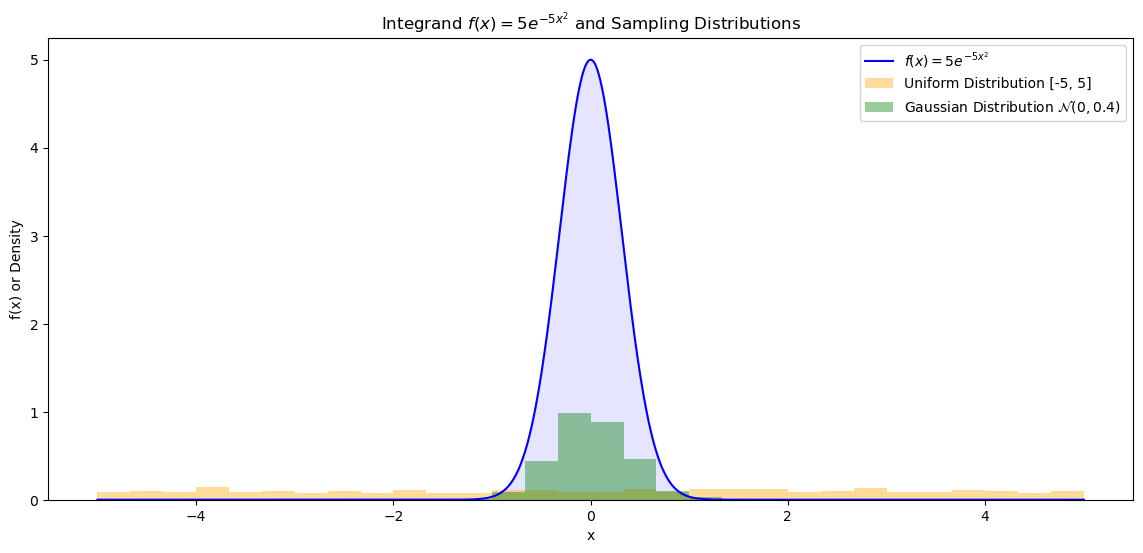

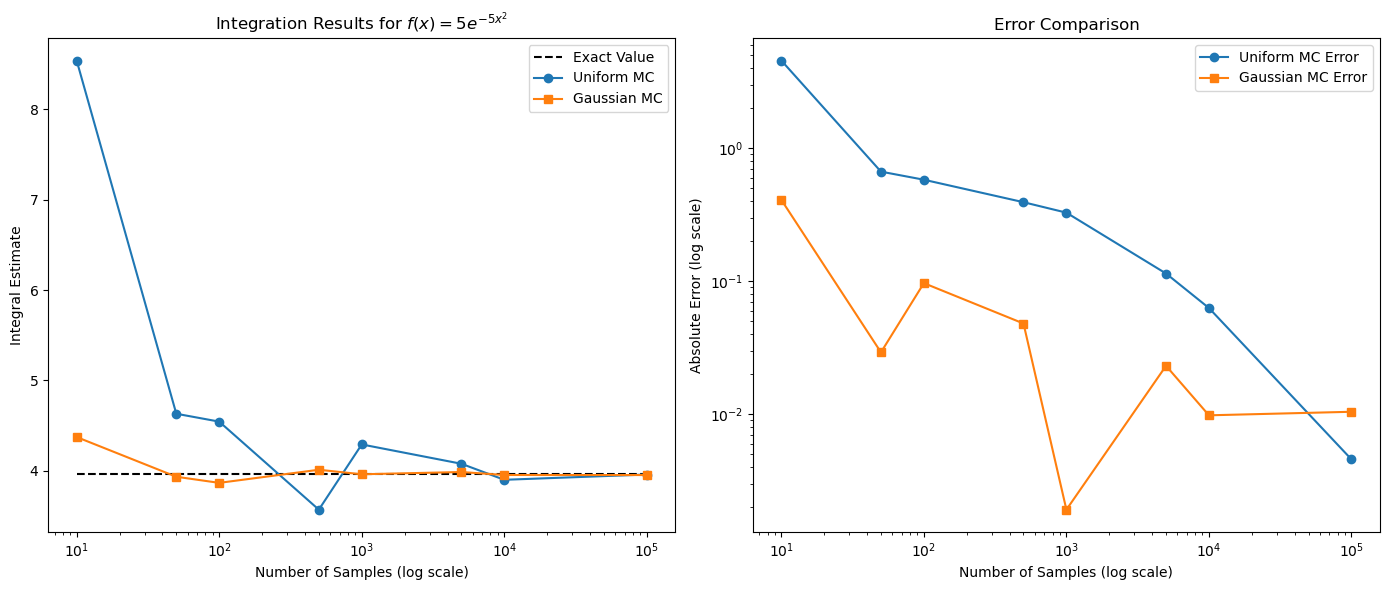

In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

A=5
B=5
# Define the integrand
def integrand(x):
    return A*np.exp(-B*x**2)

# Define the exact integral of exp(-x^2) from -infinity to infinity (for comparison)
exact_value = np.sqrt(np.pi)

def exact_integral_exp(a, b):
    """Calculate the exact integral of exp(-x^2) over [a, b] using scipy."""
    result, _ = quad(lambda x: A*np.exp(-B*x**2), a, b)
    return result

def monte_carlo_uniform_exp(a, b, N):
    """Approximate the integral of exp(-x^2) over [a, b] using Monte Carlo sampling with uniform distribution."""
    samples = np.random.uniform(a, b, N)
    f_samples = integrand(samples)
    integral = (b - a) * np.mean(f_samples)
    return integral

def monte_carlo_gaussian_exp(mu, sigma, N):
    """Approximate the integral of exp(-x^2) over [-inf, inf] using importance sampling with a Gaussian distribution."""
    samples = np.random.normal(mu, sigma, N)
    f_samples = integrand(samples)
    weights = np.exp(-samples**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi * sigma**2))  # Gaussian PDF
    integral = np.mean(f_samples / weights)
    return integral

# Set interval, number of samples, and Gaussian parameters for importance sampling
a, b = -5, 5
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 100000]
mu, sigma = 0, 0.4  # Gaussian centered at 0 with standard deviation 1

# Arrays to store results
exact_results = []
uniform_mc_results = []
gaussian_mc_results = []
uniform_mc_errors = []
gaussian_mc_errors = []

# Compute exact solution over the interval [a, b] for comparison
exact_result = exact_integral_exp(a, b)

# Monte Carlo integrations with both uniform and Gaussian sampling
for N in sample_sizes:
    uniform_result = monte_carlo_uniform_exp(a, b, N)
    gaussian_result = monte_carlo_gaussian_exp(mu, sigma, N)
    
    # Store results and compute errors
    uniform_mc_results.append(uniform_result)
    gaussian_mc_results.append(gaussian_result)
    uniform_mc_errors.append(abs(uniform_result - exact_result))
    gaussian_mc_errors.append(abs(gaussian_result - exact_result))

# Display results in a structured format
results_df = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Exact Result': [exact_result] * len(sample_sizes),
    'Uniform MC Result': uniform_mc_results,
    'Gaussian MC Result': gaussian_mc_results,
    'Uniform MC Error': uniform_mc_errors,
    'Gaussian MC Error': gaussian_mc_errors
})

flabel = fr'$f(x) = {A} e^{{-{B} x^2}}$'
print(f"Integration results for {flabel} over [-5, 5]:")
print(results_df)

# Plotting

# Plot the integrand f(x) and sampling distributions
plt.figure(figsize=(14, 6))

# Define the range and values of the integrand for visualization
x_vals = np.linspace(-5, 5, 1000)
y_vals = integrand(x_vals)

# Plot the integrand
plt.plot(x_vals, y_vals, 'b-', label=flabel)
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.1)

# Generate sample points for the uniform and Gaussian distributions
uniform_samples = np.random.uniform(a, b, 1000)
gaussian_samples = np.random.normal(mu, sigma, 1000)

# Overlay the sampling distributions
plt.hist(uniform_samples, bins=30, range=(-5, 5), density=True, color='orange', alpha=0.4, label='Uniform Distribution [-5, 5]')
plt.hist(gaussian_samples, bins=30, range=(-5, 5), density=True, color='green', alpha=0.4, label=r'Gaussian Distribution $\mathcal{N}(0, 0.4)$')

# Labeling the plot
plt.xlabel('x')
plt.ylabel('f(x) or Density')
plt.title(f'Integrand {flabel} and Sampling Distributions')
plt.legend()
plt.show()

# Plot the integration results and errors
plt.figure(figsize=(14, 6))

# Plot the integration results
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, [exact_result] * len(sample_sizes), 'k--', label='Exact Value')
plt.plot(sample_sizes, uniform_mc_results, 'o-', label='Uniform MC')
plt.plot(sample_sizes, gaussian_mc_results, 's-', label='Gaussian MC')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Integral Estimate')
plt.title(f'Integration Results for {flabel}')
plt.legend()

# Plot the error comparison
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, uniform_mc_errors, 'o-', label='Uniform MC Error')
plt.plot(sample_sizes, gaussian_mc_errors, 's-', label='Gaussian MC Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Error Comparison')
plt.legend()

plt.tight_layout()
plt.show()


Recall the general formula for Monte Carlo integration includes dividing by the pdf $p(x)$ from which we are sampling, as shown below:

\begin{equation}
\int_D f(x) \, dx \approx \mathbb{E}_{x \sim p(x)} \left[ \frac{f(x)}{p(x)} \right] = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)}.
\end{equation}

### Gaussian Probability Density Function (pdf)

The pdf for a Gaussian (normal) distribution with mean $\mu$ and variance $\sigma^2$ is given by:

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right).
\end{equation}


### Importance Sampling in the Context of Hamilton-Jacobi Equations

In Hamilton-Jacobi (HJ) equations, integrals often involve convolutions with a **heat kernel**, representing diffusion over time. For instance, the viscous solution $v_\delta(x, t)$ of the HJ equation can be expressed as:

\begin{equation}
v_\delta(x, t) = (2 \pi \delta t)^{-n/2} \int_{\mathbb{R}^n} \exp \left( -\frac{f(y)}{\delta} \right) \exp \left( -\frac{(x - y)^2}{2 \delta t} \right) dy,
\end{equation}

where the Gaussian term acts as a kernel centered at $x$ with variance $\delta t$. This Gaussian kernel is proportional to the **probability density function** of a normal distribution with mean $x$ and standard deviation $\sqrt{\delta t}$, which allows us to rewrite the convolution as an **expectation** over samples from a Gaussian distribution.

### Using the Heat Kernel for Expectations

Since the heat kernel corresponds to a Gaussian distribution $\mathcal{N}(x, \delta t)$, we can rewrite $\nabla v_\delta(x, t)$ as:

\begin{equation}
\nabla v_\delta(x, t) = (2 \pi \delta t)^{-n/2} \int_{\mathbb{R}^n} \frac{x - y}{\delta t} \exp \left( -\frac{(x - y)^2}{2 \delta t} \right) \exp \left( -\frac{f(y)}{\delta} \right) dy.
\end{equation}

Using this Gaussian form for sampling, we can approximate the gradient of $u_\delta(x, t)$ as:

\begin{equation}
\nabla u_\delta(x, t) = -\delta \cdot \frac{\nabla v_\delta(x, t)}{v_\delta(x, t)},
\end{equation}

where $v_\delta(x, t)$ is approximated through expectations.

### Monte Carlo Approximation for the Expectation

We can use Monte Carlo sampling to estimate these expectations by drawing samples $y \sim \mathcal{N}(x, \delta t)$. This leads to the approximation:

\begin{equation}
\nabla u_\delta(x, t) \approx \frac{1}{t} \cdot \frac{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[(x - y) \exp \left( -\frac{f(y)}{\delta} \right) \right]}{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[ \exp \left( -\frac{f(y)}{\delta} \right) \right]}
                        = \frac{1}{t} \cdot \left( x - \frac{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[(y \exp \left( -\frac{f(y)}{\delta} \right) \right]}{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[ \exp \left( -\frac{f(y)}{\delta} \right) \right]} \right),
\end{equation}

where the ratio of these expected values provides an approximation of the gradient $\nabla u_\delta(x, t)$.

Importantly, when we sample from a Gaussian $ p(x)$, the Gaussian term in the integral cancels with the gaussian pdf $p(x)$ in the denominator (recall the gneral Monte Carlo formula), simplifying the estimation.

### Practical Considerations for $t$-Dependent Sampling

The number of samples required depends on the value of $t$:
- **Small $t$**: When $t$ is small, the Gaussian kernel is sharply concentrated around $x$, so fewer samples are typically sufficient to estimate the expectation accurately.
- **Large $t$**: For larger $t$, the kernel spreads out, requiring more samples to capture the range of values effectively.

This approach enables us to approximate the solution to the HJ equation through sampling-based methods, where importance sampling with a Gaussian distribution centered at $x$ effectively captures the main contributions to the integral due to it's gaussian form.


### Underflow/ Overflow Issues

In this code, we encounter a numerical issue due to the Monte Carlo integral result being very close to zero. Since the integral approximates values close to zero, dividing by this integral leads to significant numerical instability. This can cause underflow (if the value is extremely small and rounds to zero) or overflow (if the inverse becomes exceedingly large) issues during computation.


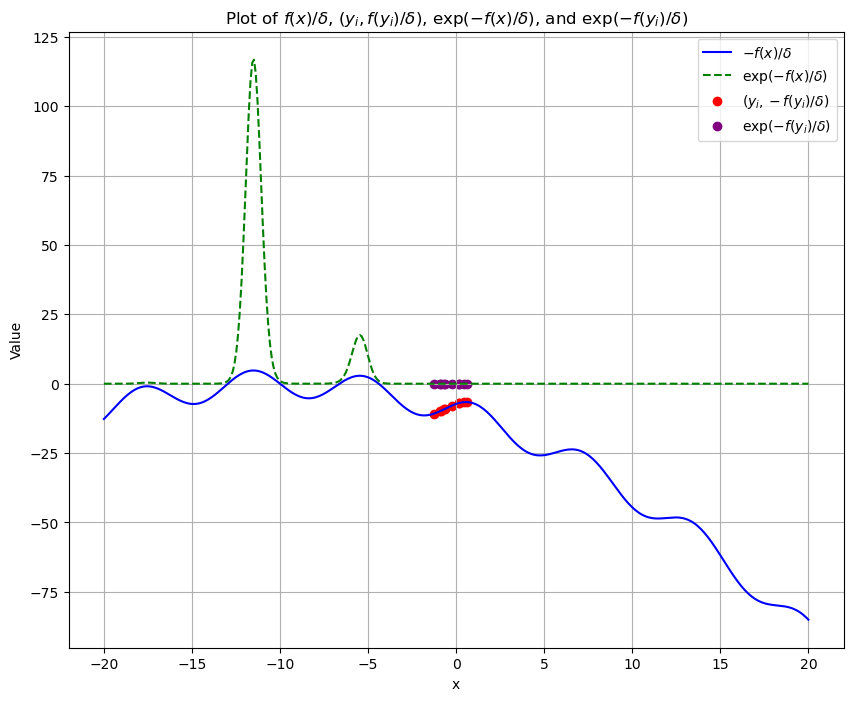

In [882]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) / delta
def minus_f_over_delta(x, delta):
    return -(1 / delta) * (5 * np.sin(x + 10) + 0.1 * (x + 10) ** 2)

# Parameters
delta = 1.0
x_k = 0  # Center of Gaussian distribution for sampling
t = 0.5  # Variance factor for Gaussian sampling
standard_deviation=np.sqrt(delta * t)
n_samples=10

# Generate 10 samples y_i from a Gaussian distribution around x_k with variance delta * t
y_samples = np.random.normal(x_k, standard_deviation, n_samples)

# Calculate f(y_i) / delta for each sample
f_y_samples = minus_f_over_delta(y_samples, delta)

# Define a range for x to plot the function
x_range = np.linspace(-20, 20, 400)

# Calculate f(x) / delta for the range of x
f_x_range = minus_f_over_delta(x_range, delta)

# Calculate exp(-f(x) / delta) and exp(-f(y_i) / delta) for each point
exp_neg_f_x = np.exp(f_x_range)
exp_neg_f_y_samples = np.exp(f_y_samples)

# Plotting
plt.figure(figsize=(10, 8))

# Plot f(x) / delta
plt.plot(x_range, f_x_range, label=r'$-f(x) / \delta$', color='blue')

# Plot the points (y_i, f(y_i) / delta)
plt.scatter(y_samples, f_y_samples, color='red', label=r'$(y_i, -f(y_i) / \delta)$')

# Plot exp(-f(x) / delta)
plt.plot(x_range, exp_neg_f_x, label=r'$\exp(-f(x) / \delta)$', color='green', linestyle='--')

# Plot exp(-f(y_i) / delta) as scatter points
plt.scatter(y_samples, exp_neg_f_y_samples, color='purple', label=r'$\exp(-f(y_i) / \delta)$')

# Labels and legend
plt.xlabel('x')
plt.ylabel('Value')
plt.title(r'Plot of $f(x) / \delta$, $(y_i, f(y_i) / \delta)$, $\exp(-f(x) / \delta)$, and $\exp(-f(y_i) / \delta)$')
plt.legend()
plt.grid(True)
plt.show()


### Maximum Rescaling of the Exponent


Subtracting the maximum exponent shifts all values closer to zero, reducing the risk of underflow/overflow while preserving the relative sizes of the values. This adjustment stabilizes the computation, allowing for accurate and reliable results without altering the relationships between terms.


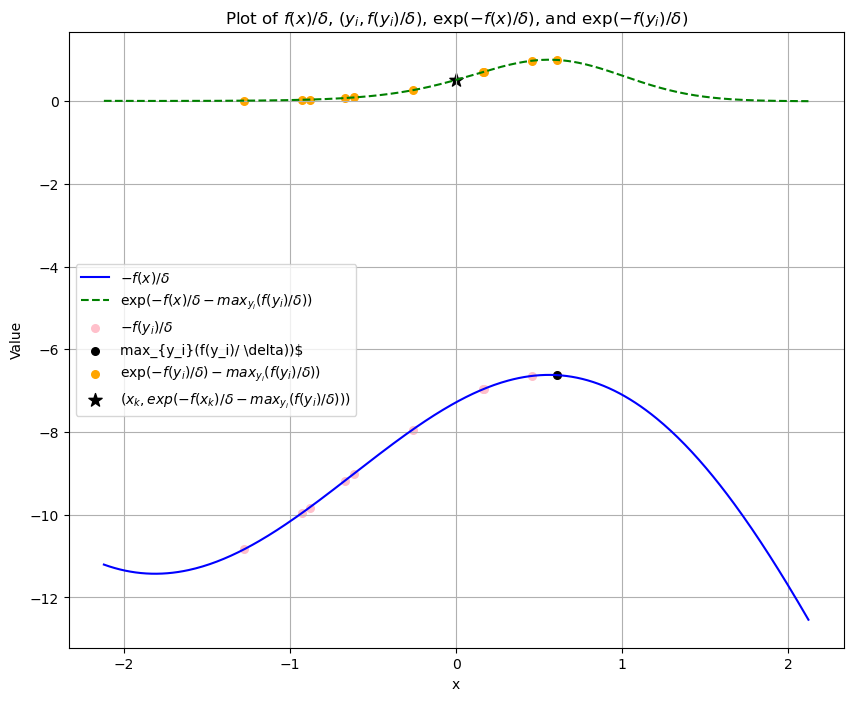

In [883]:
# Calculate f(y_i) / delta for each sample
exponents = minus_f_over_delta(y_samples, delta)
max_exponent = np.max(exponents)
max_index = np.argmax(exponents)

# Define a range for x to plot the function
x_range = np.linspace(x_k-3*standard_deviation, x_k+3*standard_deviation, 400)

# Calculate f(x) / delta for the range of x
exponents_range = minus_f_over_delta(x_range, delta)

# Calculate exp(-f(x) / delta) and exp(-f(y_i) / delta) for each point
exp_minus_f_over_delta = np.exp(exponents_range-max_exponent)
exp_samples = np.exp(exponents-max_exponent)

# Plotting
plt.figure(figsize=(10, 8))

# Plot -f(x) / delta
plt.plot(x_range, exponents_range, label=r'$-f(x) / \delta$', color='blue')

# Plot -f(x) / delta
plt.scatter(y_samples, exponents, label=r'$-f(y_i) / \delta$', color='pink', s=30)
plt.scatter(y_samples[max_index], max_exponent, label=r'max_{y_i}(f(y_i)/ \delta))$', color='black', s=30)

# Plot exp(-f(x) / delta)
plt.plot(x_range, exp_minus_f_over_delta, label=r'$\exp(-f(x) / \delta - max_{y_i}(f(y_i)/ \delta))$', color='green', linestyle='--')

# Plot exp(-f(y_i) / delta) as scatter points
plt.scatter(y_samples, exp_samples, color='orange', s=30, label=r'$\exp(-f(y_i) / \delta) - max_{y_i}(f(y_i)/ \delta))$')

# Plot the points (x_k, f(x_k) / delta)
plt.scatter(x_k, np.exp(minus_f_over_delta(x_k,delta)-max_exponent), color='black',marker='*', s=100,label=r'$(x_k, exp(-f(x_k) / \delta - max_{y_i}(f(y_i)/ \delta)))$')


# Labels and legend
plt.xlabel('x')
plt.ylabel('Value')
plt.title(r'Plot of $f(x) / \delta$, $(y_i, f(y_i) / \delta)$, $\exp(-f(x) / \delta)$, and $\exp(-f(y_i) / \delta)$')
plt.legend()
plt.grid(True)
plt.show()

## Rescaling the exponent

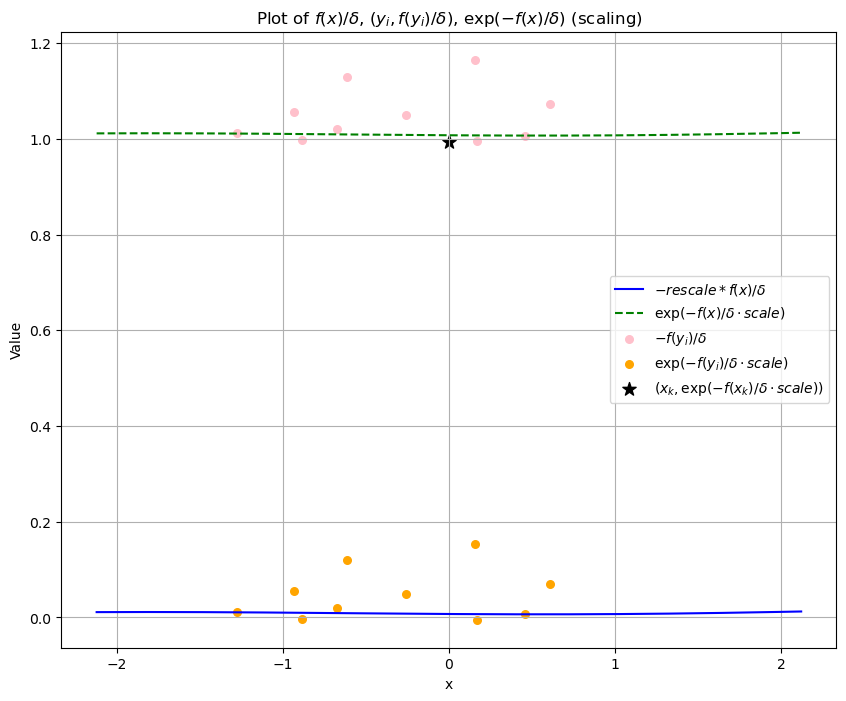

In [884]:
# Scaling approach with a fixed rescale factor
rescale = 0.001
standard_dev_rescale = np.sqrt(delta * t/rescale)
y_samples_rescale = np.random.normal(x_k, standard_dev_rescale, n_samples)
exponents_range_scaled = -rescale*minus_f_over_delta(y_samples_rescale, delta)
exp_minus_f_over_delta_scaled = np.exp(exponents_range_scaled)

# Define a range for x to plot the function
x_range = np.linspace(x_k - 3 * standard_deviation, x_k + 3 * standard_deviation, 400)

# Calculate f(x) / delta for the range of x
exponents_range = -rescale*minus_f_over_delta(x_range, delta)
scaled_exp = np.exp(exponents_range)

# Plotting
plt.figure(figsize=(10, 8))

# Plot -f(x) / delta
plt.plot(x_range, exponents_range, label=r'$-rescale*f(x) / \delta$', color='blue')

# Plot -f(y_i) / delta as individual points
plt.scatter(y_samples, exp_minus_f_over_delta_scaled, label=r'$-f(y_i) / \delta$', color='pink', s=30)

# Plot exp(-f(x) / delta) with scaling
plt.plot(x_range, scaled_exp, label=r'$\exp(-f(x) / \delta \cdot scale)$', color='green', linestyle='--')

# Plot exp(-f(y_i) / delta) as scatter points with scaling
plt.scatter(y_samples, exponents_range_scaled, color='orange', s=30, label=r'$\exp(-f(y_i) / \delta \cdot scale)$')

# Mark the scaled point at x_k
plt.scatter(x_k, np.exp(minus_f_over_delta(x_k, delta) * rescale), color='black', marker='*', s=100,
            label=r'$(x_k, \exp(-f(x_k) / \delta \cdot scale))$')

# Labels and legend
plt.xlabel('x')
plt.ylabel('Value')
plt.title(r'Plot of $f(x) / \delta$, $(y_i, f(y_i) / \delta)$, $\exp(-f(x) / \delta)$ (scaling)')
plt.legend()
plt.grid(True)
plt.show()

## Testing for 1 Sample


When using 1 sample we would expect the prox to be exactly the sample as the exponential terms cancel out. However, if we are niave about how we deal with under/overflow we will not get the expected results.

In [885]:
# Original Test Case for Sine-based Function
def minus_f_over_delta(x, delta):
    return -(1 / delta) * (5 * np.sin(x + 10) + 0.1 * (x + 10) ** 2)

# Parameters for original test case
x_k = -100
n_samples=1
y_samples = np.random.normal(x_k, standard_deviation, n_samples)

# Calculate exp(-f(y) / delta) for each sample, subtracting the max for numerical stability
exponents = minus_f_over_delta(y_samples, delta)
max_exponent = np.max(exponents)
exp_values_stable = np.exp(exponents - max_exponent)

# Monte Carlo estimation for the original function with max scaling
expectation_numerator = np.mean(y_samples * exp_values_stable)
expectation_denominator = np.mean(exp_values_stable)
prox_xk_stable = expectation_numerator / expectation_denominator

# Naive Approach for original function with epsilon
exp_values_eps = np.exp(exponents)
expectation_numerator_eps = np.mean(y_samples * exp_values_eps)
expectation_denominator_eps = np.mean(exp_values_eps)
prox_xk_eps = expectation_numerator_eps / (expectation_denominator_eps + eps)

# Completely naive approach for the original function
try:
    prox_xk_naive = expectation_numerator_eps / expectation_denominator_eps
except ZeroDivisionError:
    prox_xk_naive = float('nan')

# Output results for the original function
print("\nOriginal Function Test Case:")
print("Approximated Prox_xk using max scaling (stable):", prox_xk_stable)
print("Approximated Prox_xk using epsilon approach:", prox_xk_eps)
print("Approximated Prox_xk completely naive approach:", prox_xk_naive)
print("Single sample (for comparison):", y_samples[0])




Original Function Test Case:
Approximated Prox_xk using max scaling (stable): -100.71052092562172
Approximated Prox_xk using epsilon approach: 0.0
Approximated Prox_xk completely naive approach: nan
Single sample (for comparison): -100.71052092562172


/tmp/ipykernel_19057/1726023150.py:28: RuntimeWarning: invalid value encountered in scalar divide
  prox_xk_naive = expectation_numerator_eps / expectation_denominator_eps


## Testing for a Known Prox

In [886]:
# Define the test quadratic function f(x)
def f(x):
    return (1/2)*x ** 2

# Parameters
delta = 0.01
x_k = 20  # Test point for the quadratic function proximal
t = 0.1
standard_deviation = np.sqrt(delta * t)

# Generate samples from a Gaussian distribution centered at x_k with variance delta * t
num_samples = 10
y_samples = np.random.normal(x_k, standard_deviation, num_samples)

# Calculate exp(-f(y) / delta) for each sample, subtracting the max for numerical stability
exponents = -f(y_samples)/delta
max_exponent = np.max(exponents)
exp_values_stable = np.exp(exponents - max_exponent)

# Monte Carlo estimation of the expectation with max exponent scaling
expectation_numerator_stable = np.mean(y_samples * exp_values_stable)
expectation_denominator_stable = np.mean(exp_values_stable)
prox_xk_stable = expectation_numerator_stable / expectation_denominator_stable

# Exact solution for the proximal operator of the quadratic function
prox_xk_exact = x_k/(1+t)

# Naive Approach with epsilon to avoid division by zero
eps = 1e-10
exp_values = np.exp(exponents)
expectation_numerator = np.mean(y_samples * exp_values)
expectation_denominator = np.mean(exp_values)
prox_xk_eps = expectation_numerator / (expectation_denominator + eps)

# Completely naive approach without any stabilization
try:
    prox_xk_naive = expectation_numerator / expectation_denominator
except Exception:
    prox_xk_naive = float('nan')  # Assign NaN if division by zero occurs

# Via variance effecting rescaling of f
rescale = 0.001
standard_dev_rescale = np.sqrt(delta * t/rescale)
y_samples_rescale = np.random.normal(x_k, standard_dev_rescale, num_samples)
exponents_rescale = -rescale*f(y_samples_rescale)/delta
exp_values_rescale = np.exp(exponents_rescale)

# Monte Carlo estimation of the expectation with variance effecting rescaling
expectation_numerator_rescale = np.mean(y_samples_rescale * exp_values_rescale)
expectation_denominator_rescale = np.mean(exp_values_rescale)
prox_xk_rescale = expectation_numerator_rescale / expectation_denominator_rescale

# Output the results
print(f"Quadratic Function Test for {num_samples} samples:")
print("Approximated Prox_xk using max scaling (stable):", prox_xk_stable)
print("Exact Prox_xk for quadratic function:", prox_xk_exact)
print("Error (stable):", np.abs(prox_xk_stable - prox_xk_exact))

print("\nNaive Approach Results:")
print("Approximated Prox_xk using epsilon approach:", prox_xk_eps)
print("Error (epsilon approach):", np.abs(prox_xk_eps - prox_xk_exact))
print("Approximated Prox_xk completely naive approach:", prox_xk_naive)
print("Error (completely naive approach):", np.abs(prox_xk_naive - prox_xk_exact) if not np.isnan(prox_xk_naive) else "NaN due to division by zero")
print("Approximated Prox_xk variance effecting rescaling naive approach:", prox_xk_rescale)
print("Error (variance effecting rescaling naive approach):", np.abs(prox_xk_rescale - prox_xk_exact))

Quadratic Function Test for 10 samples:
Approximated Prox_xk using max scaling (stable): 19.9456049901406
Exact Prox_xk for quadratic function: 18.18181818181818
Error (stable): 1.7637868083224184

Naive Approach Results:
Approximated Prox_xk using epsilon approach: 0.0
Error (epsilon approach): 18.18181818181818
Approximated Prox_xk completely naive approach: nan
Error (completely naive approach): NaN due to division by zero
Approximated Prox_xk variance effecting rescaling naive approach: 18.907788382282114
Error (variance effecting rescaling naive approach): 0.7259702004639337


/tmp/ipykernel_19057/1207424081.py:37: RuntimeWarning: invalid value encountered in scalar divide
  prox_xk_naive = expectation_numerator / expectation_denominator



10 Samples
mean maxscale=-15.818464080554907
range = 72.14514004030865
mean rescale=-23.573381210534123
range = 117.78247145126136

46 Samples
mean maxscale=-15.599795226074294
range = 154.70746786754512
mean rescale=-27.72660965443273
range = 164.4490206772277

215 Samples
mean maxscale=-23.256926451661528
range = 259.7759277926343
mean rescale=-22.193308898550356
range = 186.10472157883584

1000 Samples
mean maxscale=-28.124711017463532
range = 330.3747836801791
mean rescale=-24.766344669242056
range = 495.6169940377802

4641 Samples
mean maxscale=-25.42136070769668
range = 406.22141853773417
mean rescale=-25.411655249537116
range = 373.4605298281007

21544 Samples
mean maxscale=-24.708634967076932
range = 411.39136958404185
mean rescale=-24.89111422311938
range = 443.7153717892748

100000 Samples
mean maxscale=-25.13741549979264
range = 527.1614747240933
mean rescale=-25.035666216006703
range = 439.1525289013099

464158 Samples
mean maxscale=-24.89911376431898
range = 579.282484351

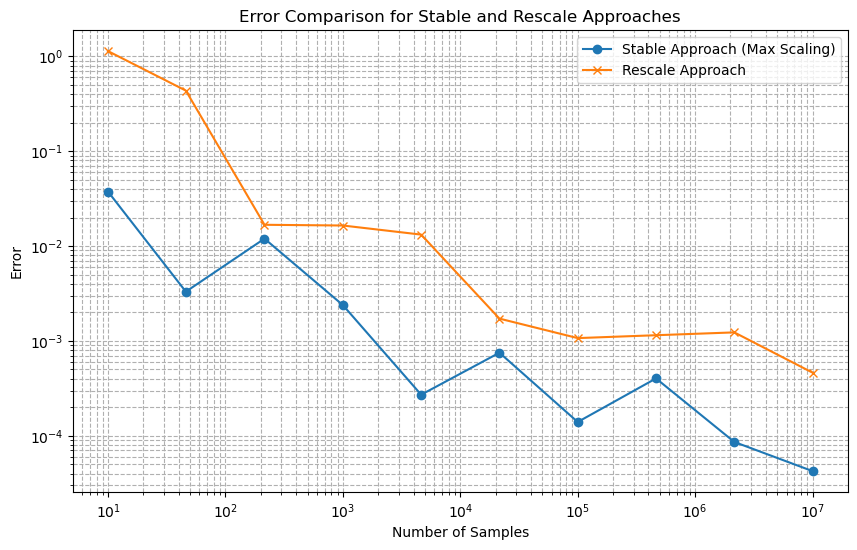

In [890]:
# Re-import libraries due to state reset
import numpy as np
import matplotlib.pyplot as plt

# Define the test quadratic function f(x)
def f(x):
    return (1 / 2) * x ** 2

# Parameters
delta = 0.01
x_k = 0  # Test point for the quadratic function proximal
t = 50
standard_deviation = np.sqrt(delta * t)

# Exact solution for the proximal operator of the quadratic function
prox_xk_exact = x_k / (1 + t)

# Define sample sizes for testing
sample_sizes = np.logspace(1, 7, num=10, dtype=int)

# Initialize lists to store errors
errors_stable = []
errors_rescale = []

for num_samples in sample_sizes:
    # Generate samples for max scaling stable approach
    y_samples = np.random.normal(x_k, standard_deviation, num_samples)
    exponents = -f(y_samples) / delta
    max_exponent = np.max(exponents)
    exp_values_stable = np.exp(exponents - max_exponent)
    print(f"\n{num_samples} Samples")
    print(f"mean maxscale={np.mean(exponents - max_exponent)}")
    print(f'range = {np.max(exponents - max_exponent)-np.min(exponents - max_exponent)}')
    
    # Monte Carlo estimation for stable approach
    expectation_numerator_stable = np.sum(y_samples * exp_values_stable)
    expectation_denominator_stable = np.sum(exp_values_stable)
    prox_xk_stable = expectation_numerator_stable / expectation_denominator_stable
    error_stable = np.abs(prox_xk_stable - prox_xk_exact)
    errors_stable.append(error_stable)

    # Generate samples for rescale approach
    rescale = 0.01
    standard_dev_rescale = np.sqrt(delta * t / rescale)
    y_samples_rescale = np.random.normal(x_k, standard_dev_rescale, num_samples)
    exponents_rescale = -rescale * f(y_samples_rescale) / delta
    exp_values_rescale = np.exp(exponents_rescale)
    print(f"mean rescale={np.mean(exponents_rescale)}")
    print(f'range = {np.max(exponents_rescale)-np.min(exponents_rescale)}')
    
    # Monte Carlo estimation for rescale approach
    expectation_numerator_rescale = np.mean(y_samples_rescale * exp_values_rescale)
    expectation_denominator_rescale = np.mean(exp_values_rescale)
    prox_xk_rescale = expectation_numerator_rescale / expectation_denominator_rescale
    error_rescale = np.abs(prox_xk_rescale - prox_xk_exact)
    errors_rescale.append(error_rescale)

# Plot the errors for both approaches
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, errors_stable, label='Stable Approach (Max Scaling)', marker='o')
plt.plot(sample_sizes, errors_rescale, label='Rescale Approach', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Error')
plt.title('Error Comparison for Stable and Rescale Approaches')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


### Summary of Findings on Handling Overflow/Underflow in Proximal Operator Calculations


#### 1. **Naive Approach**
   - **Method**: Directly computes the mean of exponentiated terms without scaling or adjustments.
   - **Limitations**:
     - Highly susceptible to overflow/underflow due to large exponent values.
     - In cases where the denominator becomes extremely small, it may result in `NaN` values due to division by zero.
   - **Recommendation**: Not suitable for cases with large exponents; this method should be avoided for stability.

#### 2. **Addition of Epsilon to Denominator**
   - **Method**: Adds a small epsilon value to the denominator to avoid division by zero.
   - **Limitations**:
     - While it avoids `NaN` values, adding epsilon can still result in a distorted prox_xk if the denominator values are very close to zero, as the result may be overly influenced by the epsilon term.
     - Rounding issues remain, as extremely small values compared to epsilon can lead to inaccuracies.
   - **Recommendation**: Better than the naive approach for small samples, but still prone to numerical errors for very large or very small exponent values.

#### 3. **Max Scaling**
   - **Method**: Subtracts the maximum exponent value from all terms before exponentiating, reducing the size  of the exponent values without effecting the variance.
   - **Limitations**:
     - If the difference between minimum and maximum exponents is too large this won't be fixed, only values close to the max exponent will contribute meaningfully to the mean, effectively truncating smaller contributions.
     - This means that increasing sample size will not lead to convergence to the correct prox.
   - **Recommendation**: Problems occur when f(x) has sharp structure leading to large differences in exponent values. Max scaling is okay if you are happy to lose accuracy due to truncation of smaller values.

#### 4. **Rescale Approach**
   - **Method**: Applies a rescaling factor to reduce the overall spread of exponent values.
   - **Limitations**:
     - Requires tuning of the rescale factor (this could be done be running it until the demoninator is greater than a certain tolerence but will cost time)
     - the scaling results in a potientially large increase in variance and as a result more samples are needed for an accuracte expectation.
   - **Recommendation**: This methods does converge as the sample size increases.

---

### Conclusion: Best Approach

The **Rescale Approach** paired with a method to find the optimal rescaling factor is the best as it allows for stability and convergence when sample size increases, however, more samples will be needed then in the niave approaches.
